# Artificial Intelligence Nanodegree
## Recurrent Neural Network Projects

Welcome to the Recurrent Neural Network Project in the Artificial Intelligence Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Implementation TODOs in this notebook

This notebook contains two problems, cut into a variety of TODOs.  Make sure to complete each section containing a TODO marker throughout the notebook.  For convinence we provide links to each of these sections below.

[TODO #1: Implement a function to window time series](#TODO_1)

[TODO #2: Create a simple RNN model using keras to perform regression](#TODO_2)

[TODO #3: Finish cleaning a large text corpus](#TODO_3)

[TODO #4: Implement a function to window a large text corpus](#TODO_4)

[TODO #5: Create a simple RNN model using keras to perform multiclass classification](#TODO_5)

[TODO #6: Generate text using a fully trained RNN model and a variety of input sequences](#TODO_6)


# Problem 1: Perform time series prediction 

In this project you will perform time series prediction using a Recurrent Neural Network regressor.  In particular you will re-create the figure shown in the notes - where the stock price of Apple was forecasted (or predicted) 7 days in advance.  In completing this exercise you will learn how to construct RNNs using Keras, which will also aid in completing the second project in this notebook.

The particular network architecture we will employ for our RNN is known as  [Long Term Short Memory (LTSM)](https://en.wikipedia.org/wiki/Long_short-term_memory), which helps significantly avoid technical problems with optimization of RNNs.  

## 1.1 Getting started

First we must load in our time series - a history of around 140 days of Apple's stock price.  Then we need to perform a number of pre-processing steps to prepare it for use with an RNN model.  First off, it is good practice to normalize time series - by normalizing its range.  This helps us avoid serious numerical issues associated how common activation functions (like tanh) transform very large (positive or negative) numbers, as well as helping us to avoid related issues when computing derivatives.

Here we normalize the series to lie in the range [0,1] [using this scikit function](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), but it is also commonplace to normalize by a series standard deviation.

In [3]:
### Load in necessary libraries for data input and normalization
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### load in and normalize the dataset
dataset = np.loadtxt('datasets/normalized_apple_prices.csv')

Lets take a quick look at the (normalized) time series we'll be performing predictions on.

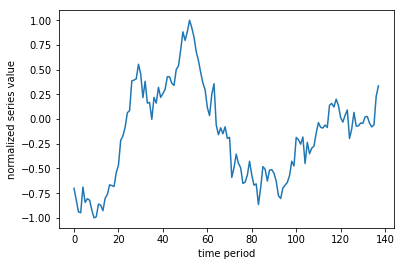

In [4]:
# lets take a look at our time series
plt.plot(dataset)
plt.xlabel('time period')
plt.ylabel('normalized series value')

## 1.2  Cutting our time series into sequences

Remember, our time series is a sequence of numbers that we can represent in general mathematically as 

$$s_{0},s_{1},s_{2},...,s_{P}$$

where $s_{p}$ is the numerical value of the time series at time period $p$ and where $P$ is the total length of the series.  In order to apply our RNN we treat the time series prediction problem as a regression problem, and so need to use a sliding window to construct a set of associated input/output pairs to regress on.  This process is animated in the gif below.

<img src="images/timeseries_windowing_training.gif" width=600 height=600/>

For example - using a window of size T = 5 (as illustrated in the gif above) we produce a set of input/output pairs like the one shown in the table below

$$\begin{array}{c|c}
\text{Input} & \text{Output}\\
\hline \color{CornflowerBlue} {\langle s_{1},s_{2},s_{3},s_{4},s_{5}\rangle} & \color{Goldenrod}{ s_{6}} \\
\ \color{CornflowerBlue} {\langle s_{2},s_{3},s_{4},s_{5},s_{6} \rangle } & \color{Goldenrod} {s_{7} } \\
\color{CornflowerBlue}  {\vdots} & \color{Goldenrod} {\vdots}\\
\color{CornflowerBlue} { \langle s_{P-5},s_{P-4},s_{P-3},s_{P-2},s_{P-1} \rangle } & \color{Goldenrod} {s_{P}}
\end{array}$$

Notice here that each input is a sequence (or vector) of length 4 (and in general has length equal to the window size T) while each corresponding output is a scalar value.  Notice also how given a time series of length P and window size T = 5 as shown above, we created P - 5  input/output pairs.  More generally, for a window size T we create P - T such pairs.

Now its time for you to window the input time series as described above!  

<a id='TODO_1'></a>

**TODO:** Fill in the function below - called **window_transform_series** - that runs a sliding window along the input series and creates associated input/output pairs.    Note that this function should input a) the series and b) the window length, and return the input/output subsequences.  Make sure to format returned input/output as generally shown in table above (where window_size = 5), and make sure your returned input is a numpy array.

-----

You can test your function on the list of odd numbers given below

In [5]:
odd_nums = np.array([1,3,5,7,9,11,13])
print(int(len(odd_nums)/2))

3


To window this sequence with a window_size = 2 using the **window_transform_series** you should get the following input/output pairs

In [6]:
def window_transform_series(dataset, window_size):
    #Function to run a sliding window of window_size across the dataset
    dataX, dataY = [], []
    for i in range(len(dataset)-window_size):
        a = dataset[i:(i+window_size)]
        dataX.append(a)
        dataY.append(dataset[i + window_size])
    return np.array(dataX), (np.array(dataY)).reshape(-1,1)

In [7]:
# run a window of size 2 over the odd number sequence and display the results
window_size = 2
X,y = window_transform_series(odd_nums,window_size)

# print out input/output pairs --> here input = X, corresponding output = y
print ('--- the input X will look like ----')
print (X)

print ('--- the associated output y will look like ----')
print (y)

print ('the shape of X is ' + str(np.shape(X)))
print ('the shape of y is ' + str(np.shape(y)))
print('the type of X is ' + str(type(X)))
print('the type of y is ' + str(type(y)))

--- the input X will look like ----
[[ 1  3]
 [ 3  5]
 [ 5  7]
 [ 7  9]
 [ 9 11]]
--- the associated output y will look like ----
[[ 5]
 [ 7]
 [ 9]
 [11]
 [13]]
the shape of X is (5, 2)
the shape of y is (5, 1)
the type of X is <class 'numpy.ndarray'>
the type of y is <class 'numpy.ndarray'>


Again - you can check that your completed **window_transform_series** function works correctly by trying it on the odd_nums sequence - you should get the above output.

-----

In [8]:
### TODO: fill out the function below that transforms the input series and window-size into a set of input/output pairs for use with our RNN model
def window_transform_series(series,window_size):
    # containers for input/output pairs
    #Function to run a sliding window of window_size across the dataset
    dataX, dataY = [], []
    for i in range(len(series)-window_size):
        a = series[i:(i+window_size)]
        dataX.append(a)
        dataY.append(series[i + window_size])
        
    # reshape each 
    X = np.asarray(dataX)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(dataY)
    y.shape = (len(y),1)
    
    return X,y

With this function in place apply it to the series in the Python cell below.  We use a window_size = 7 for these experiments.

In [9]:
# window the data using your windowing function
window_size = 7
X,y = window_transform_series(series = dataset,window_size = window_size)
print(X.shape, y.shape)

(131, 7) (131, 1)


## 1.3  Splitting into training and testing sets

In order to perform proper testing on our dataset we will lop off the last 1/3 of it for validation (or testing).  This is that once we train our model we have something to test it on (like any regression problem!).  This splitting into training/testing sets is done in the cell below.

Note how here we are **not** splitting the dataset *randomly* as one typically would do when validating a regression model.  This is because our input/output pairs *are related temporally*.   We don't want to validate our model by training on a random subset of the series and then testing on another random subset, as this simulates the scenario that we receive new points *within the timeframe of our training set*.  

We want to train on one solid chunk of the series (in our case, the first full 2/3 of it), and validate on a later chunk (the last 1/3) as this simulates how we would predict *future* values of a time series.

In [10]:
# split our dataset into training / testing sets
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, stepsize, window size] 
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], 1, window_size)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], 1, window_size)))

<a id='TODO_2'></a>

## 1.4  Build and run an RNN regression model

Having created input/output pairs out of our time series and cut this into training/testing sets, we can now begin setting up our RNN.  We use Keras to quickly build a two hidden layer RNN of the following specifications

- layer 1 uses an LSTM module with 5 hidden units (note here the input_shape = (1,window_size))
- layer 2 uses a fully connected module with one unit
- the 'mean_squared_error' loss should be used (remember: we are performing regression here)

This can be constructed using just a few lines - see e.g., the [general Keras documentation](https://keras.io/getting-started/sequential-model-guide/) and the [LTSM documentation in particular](https://keras.io/layers/recurrent/) for examples of how to quickly use Keras to build neural network models.  Make sure you are initializing your optimizer given the [keras-recommended approach for RNNs](https://keras.io/optimizers/) (given in the cell below).  

In [11]:
### TODO: create required RNN model
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
np.random.seed(0)


# TODO: build an RNN to perform regression on our time series input/output data
model = Sequential()

#LSTM layer with 5 hidden units
model.add(LSTM(5, input_shape=(1, window_size)))

#Dropout added to avoid overfitting
model.add(Dropout(0.2))

#Fully connected layer with one output cell
model.add(Dense(1))

# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

Using TensorFlow backend.


With your model built you can now fit the model by activating the cell below!  Note: the number of epochs (np_epochs) and batch_size are preset (so we can all produce the same results).  You can choose to toggle the verbose parameter - which gives you regular updates on the progress of the algorithm - on and off by setting it to 1 or 0 respectively.

In [12]:
# run your model!
model.fit(X_train, y_train, epochs=1000, batch_size=50, verbose=0)

C:\Users\priya\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


## 1.5  Checking model performance

With your model fit we can now make predictions on both our training and testing sets.

In [13]:
# generate predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

C:\Users\priya\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


In the next cell we compute training and testing errors using our trained model - you should be able to achieve at least

*training_accuracy* < 0.02

and 

*testing_accuracy* < 0.02

with your fully trained model.  

If either or both of your accuracies are larger than 0.02 re-train your model - increasing the number of epochs you take (a maximum of around 1,000 should do the job) and/or adjusting your batch_size.

In [14]:
# print out training and testing errors
training_accuracy = model.evaluate(X_train, y_train, verbose=0)
print('training accuracy = ' + str(training_accuracy))

testing_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('testing accuracy = ' + str(testing_accuracy))

training accuracy = 0.016253803264
testing accuracy = 0.014804895859


C:\Users\priya\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Activating the next cell plots the original data, as well as both predictions on the training and testing sets. 

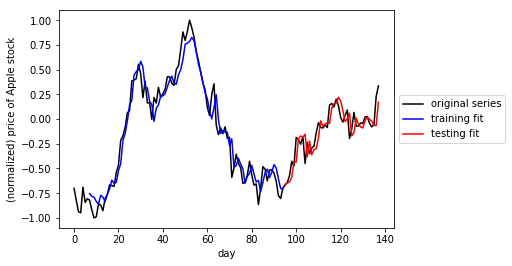

In [15]:
### Plot everything - the original series as well as predictions on training and testing sets
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
plt.plot(dataset,color = 'k')

# plot training set prediction
split_pt = train_test_split + window_size 
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('(normalized) price of Apple stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Note:** you can try out any time series for this exercise!  If you would like to try another see e.g., [this site containing thousands of time series](https://datamarket.com/data/list/?q=provider%3Atsdl) and pick another one!

# Problem 2: Create a sequence generator

## 2.1  Getting started

In this project you will implement a popular Recurrent Neural Network (RNN) architecture to create an English language sequence generator capable of building semi-coherent English sentences from scratch by building them up character-by-character.  This will require a substantial amount amount of parameter tuning on a large training corpus (at least 100,000 characters long).  In particular for this project we will be using a complete version of Sir Arthur Conan Doyle's classic book The Adventures of Sherlock Holmes.

How can we train a machine learning model to generate text automatically, character-by-character?  *By showing the model many training examples so it can learn a pattern between input and output.*  With this type of text generation each input is a string of valid characters like this one

*dogs are grea*

whlie the corresponding output is the next character in the sentence - which here is 't' (since the complete sentence is 'dogs are great').  We need to show a model many such examples in order for it to make reasonable predictions.

**Fun note:** For those interested in how text generation is being used check out some of the following fun resources:

- [Generate wacky sentences](http://www.cs.toronto.edu/~ilya/rnn.html) with this academic RNN text generator

- Various twitter bots that tweet automatically generated text like[this one](http://tweet-generator-alex.herokuapp.com/).

- the [NanoGenMo](https://github.com/NaNoGenMo/2016) annual contest to automatically produce a 50,000+ novel automatically

- [Robot Shakespeare](https://github.com/genekogan/RobotShakespeare) a text generator that automatically produces Shakespear-esk sentences

## 2.2  Preprocessing a text dataset

Our first task is to get a large text corpus for use in training, and on it we perform a several light pre-processing tasks.  The default corpus we will use is the classic book Sherlock Holmes, but you can use a variety of others as well - so long as they are fairly large (around 100,000 characters or more).  

In [16]:
# read in the text, transforming everything to lower case
text = open('datasets/holmes.txt').read().lower()
print('our original text has ' + str(len(text)) + ' characters')

our original text has 581881 characters


Next, lets examine a bit of the raw text.  Because we are interested in creating sentences of English words automatically by building up each word character-by-character, we only want to train on valid English words.  In other words - we need to remove all of the other junk characters that aren't words!

In [17]:
### print out the first 1000 characters of the raw text to get a sense of what we need to throw out
text[:2000]

"ï»¿project gutenberg's the adventures of sherlock holmes, by arthur conan doyle\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.net\n\n\ntitle: the adventures of sherlock holmes\n\nauthor: arthur conan doyle\n\nposting date: april 18, 2011 [ebook #1661]\nfirst posted: november 29, 2002\n\nlanguage: english\n\n\n*** start of this project gutenberg ebook the adventures of sherlock holmes ***\n\n\n\n\nproduced by an anonymous project gutenberg volunteer and jose menendez\n\n\n\n\n\n\n\n\n\nthe adventures of sherlock holmes\n\nby\n\nsir arthur conan doyle\n\n\n\n   i. a scandal in bohemia\n  ii. the red-headed league\n iii. a case of identity\n  iv. the boscombe valley mystery\n   v. the five orange pips\n  vi. the man with the twisted lip\n vii. the adventure of the blue carbuncle\nviii. 

Wow - there's a lot of junk here (i.e., weird uncommon character combinations - as this first character chunk contains the title and author page, as well as table of contents)!  e.g., all the carriage return and newline sequences '\n' and '\r' sequences.  We want to train our RNN on a large chunk of real english sentences - we don't want it to start thinking non-english words or strange characters are valid! - so lets clean up the data a bit.

First, since the dataset is so large and the first few hundred characters contain a lot of junk, lets cut it out.  Lets also find-and-replace those newline tags with empty spaces.

In [18]:
### find and replace '\n' and '\r' symbols - replacing them 
text = text[1302:]
text = text.replace('\n',' ')    # replacing '\n' with '' simply removes the sequence
text = text.replace('\r',' ')

Lets see how the first 1000 characters of our text looks now!

In [19]:
### print out the first 1000 characters of the raw text to get a sense of what we need to throw out
text[:1000]

" his eyes she eclipses and predominates the whole of her sex. it was not that he felt any emotion akin to love for irene adler. all emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. he was, i take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. he never spoke of the softer passions, save with a gibe and a sneer. they were admirable things for the observer--excellent for drawing the veil from men's motives and actions. but for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not be more disturbing than a strong emotion in a nature such as his. and yet there was but one woman to him, and that woman was the late irene

<a id='TODO_3'></a>

#### TODO: finish cleaning the text

Lets make sure we haven't left any other non-English/proper punctuation (commas, periods, etc., are ok) characters lurking around in the depths of the text.  You can do this by ennumerating all the text's unique characters, examining them, and then replacing any unwanted (non-english) characters with empty spaces!  Once we find all of the text's unique characters, we can remove all of the non-English/proper punctuation ones in the next cell.  Note: don't remove necessary punctuation marks!

ascii_dict = dict()
ascii_in_number = range(0,256)
for i in ascii_in_number:
    ascii_dict[str(i)] = chr(i)
    # print chars corresponding to ASCII numbers

unique_dict = {}
for num in vocab:
    val = ascii_dict.get(str(num))
    unique_dict[num] = val

print(unique_dict)


In [20]:
### TODO: list all unique characters in the text and remove any non-english ones
# find all unique characters in the text
vocab = set(text)
print(vocab)

# remove as many non-english characters and character sequences as you can 
text = text.replace('!',' ')
text = text.replace('"',' ')
text = text.replace('$',' ')
text = text.replace('%',' ')
text = text.replace('&',' ')
text = text.replace("`",' ')
text = text.replace("(",' ')
text = text.replace(")",' ')
text = text.replace("*",' ')
text = text.replace("-",' ')
text = text.replace("/",' ')
text = text.replace(";",' ')
text = text.replace("@",' ')
text = text.replace("?",' ')
text = text.replace(":",' ')
text = text.replace("'",' ')
text = text.replace("©",' ')
text = text.replace("¢",' ')
text = text.replace("¨",' ')
text = text.replace("ã",' ')
text = text.replace("\xa0",' ')
for ch in ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']:
       if ch in text:
             text=text.replace(ch,' ')


# shorten any extra dead space created above
text = text.replace('  ',' ')

{'/', "'", 'u', 'd', '©', '%', '-', 'b', 'n', 'k', '.', 'z', 't', 'f', '*', '7', 'v', '1', '"', '9', 'x', 'o', '&', ' ', 'y', ';', '(', 'p', 'c', '3', '$', ',', 'e', 'r', '6', '8', '?', '@', '2', 'm', 'j', 'g', '!', '5', '\xa0', 'l', '¨', 'ã', '4', ')', '¢', 'q', 's', ':', '0', 'w', 'i', 'h', 'a'}


With your chosen characters removed print out the first few hundred lines again just to double check that everything looks good.

In [21]:
### Test your algorithm
vocab = set(text)
print(vocab)

{'u', 'd', 'b', 'n', 'k', '.', 'z', 't', 'f', 'v', 'x', 'o', ' ', 'y', 'p', 'c', ',', 'e', 'r', 'm', 'j', 'g', 'l', 'q', 's', 'w', 'i', 'h', 'a'}


Now that we have thrown out a good number of non-English characters/character sequences lets print out some statistics about the dataset - including number of total characters and number of unique characters.

In [22]:
# count the number of unique characters in the text
chars = sorted(list(set(text)))
print(chars)

# print some of the text, as well as statistics
print ("this corpus has " +  str(len(text)) + " total number of characters")
print ("this corpus has " +  str(len(chars)) + " unique characters")

[' ', ',', '.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
this corpus has 573075 total number of characters
this corpus has 29 unique characters


## 2.3  Cutting data into input/output pairs

Now that we have our text all cleaned up, how can we use it to train a model to generate sentences automatically?  First we need to train a machine learning model - and in order to do that we need a set of input/output pairs for a model to train on.  How can we create a set of input/output pairs from our text to train on?

Remember in part 1 of this notebook how we used a sliding window to extract input/output pairs from a time series?  We do the same thing here!  We slide a window of length $T$ along our giant text corpus - everything in the window becomes one input while the character following becomes its corresponding output.  This process of extracting input/output pairs is illustrated in the gif below on a small example text using a window size of T = 4.

<img src="images/text_windowing_training.gif" width=400 height=400/>

Notice one aspect of the sliding window in this gif that does not mirror the analaogous gif for time series shown in part 1 of the notebook - we do not need to slide the window along one character at a time but can move by a fixed step size $M$ greater than 1 (in the gif indeed $M = 1$).  This is done with large input texts (like ours which has over 500,000 characters!) when sliding the window along one character at a time we would create far too many input/output pairs to be able to reasonably compute with.

More formally lets denote our text corpus - which is one long string of characters - as follows

$$s_{0},s_{1},s_{2},...,s_{P}$$

where $P$ is the length of the text (again for our text $P \approx 500,000!$).  Sliding a window of size T = 5 with a step length of M = 1 (these are the parameters shown in the gif above) over this sequence produces the following list of input/output pairs


$$\begin{array}{c|c}
\text{Input} & \text{Output}\\
\hline \color{CornflowerBlue} {\langle s_{1},s_{2},s_{3},s_{4}\rangle} & \color{Goldenrod}{ s_{5}} \\
\ \color{CornflowerBlue} {\langle s_{2},s_{3},s_{4},s_{5} \rangle } & \color{Goldenrod} {s_{6} } \\
\color{CornflowerBlue}  {\vdots} & \color{Goldenrod} {\vdots}\\
\color{CornflowerBlue} { \langle s_{P-4},s_{P-3},s_{P-2},s_{P-1} \rangle } & \color{Goldenrod} {s_{P}}
\end{array}$$

Notice here that each input is a sequence (or vector) of 4 characters (and in general has length equal to the window size T) while each corresponding output is a single character.  We created around P total number of input/output pairs  (for general step size M we create around ceil(P/M) pairs).

<a id='TODO_4'></a>

Now its time for you to window the input time series as described above! 

**TODO:** Create a function that runs a sliding window along the input text and creates associated input/output pairs.  A skeleton function has been provided for you.  Note that this function should input a) the text  b) the window size and c) the step size, and return the input/output sequences.  Note: the return items should be *lists* - not numpy arrays.

In [23]:
### TODO: fill out the function below that transforms the input text and window-size into a set of input/output pairs for use with our RNN model
def window_transform_series(text,window_size,step_size):
    # containers for input/output pairs
    inputs = []
    outputs = []
    
    n_batches = int((len(text)-window_size) / step_size)
    print(n_batches)
    
    for i in range(n_batches-1):
        a = text[i*step_size:((i*step_size)+window_size)]
        inputs.append(a)
        b = text[(i*step_size)+window_size]
        outputs.append(b)


    return inputs,outputs

With our function complete we can now use it to produce input/output pairs!  We employ the function in the next cell, where the window_size = 50 and step_size = 5.

In [24]:
# run your text window-ing function 
window_size = 100
step_size = 5
inputs, outputs = window_transform_series(text,window_size,step_size)

114595


Lets print out a few input/output pairs to verify that we have made the right sort of stuff!

In [25]:
# print out a few of the input/output pairs to verify that we've made the right kind of stuff to learn from
print('input = ' + inputs[3])
print('output = ' + outputs[3])
print('--------------')
print('input = ' + inputs[100])
print('output = ' + outputs[100])

input = clipses and predominates the whole of her sex. it was not that he felt any emotion akin to love for 
output = i
--------------
input = rver excellent for drawing the veil from men s motives and actions. but for the trained reasoner to 
output = a


Looks good!

## 2.4  Wait, what kind of problem is text generation again?

In part 1 of this notebook we used the same pre-processing technique - the sliding window - to produce a set of training input/output pairs to tackle the problem of time series prediction *by treating the problem as one of regression*.  So what sort of problem do we have here now, with text generation?  Well, the time series prediction was a regression problem because the output (one value of the time series) was a continuous value.  Here - for character-by-character text generation - each output is a *single character*.  This isn't a continuous value - but a distinct class - therefore **character-by-character text generation is a classification problem**.  

How many classes are there in the data?  Well, the number of classes is equal to the number of unique characters we have to predict!  How many of those were there in our dataset again?  Lets print out the value again.

In [26]:
# print out the number of unique characters in the dataset
chars = sorted(list(set(text)))
print ("this corpus has " +  str(len(chars)) + " unique characters")
print ('and these characters are ')
print (chars)

this corpus has 29 unique characters
and these characters are 
[' ', ',', '.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


Rockin' - so we have a multi-class classification problem on our hands!

## 2.5  One-hot encoding characters

There's just one last issue we have to deal with before tackle: machine learning algorithm deal with numerical data and all of our input/output pairs are characters.  So we just need to transform our characters into equivalent numerical values.  The most common way of doing this is via a 'one-hot encoding' scheme.  Here's how it works.

We transform each character in our inputs/outputs into a vector with length equal to the number of unique characters in our text.  This vector is all zeros except one location where we place a 1 - and this location is unique to each character type.  e.g., we transform 'a', 'b', and 'c' as follows

$$a\longleftarrow\left[\begin{array}{c}
1\\
0\\
0\\
\vdots\\
0\\
0
\end{array}\right]\,\,\,\,\,\,\,b\longleftarrow\left[\begin{array}{c}
0\\
1\\
0\\
\vdots\\
0\\
0
\end{array}\right]\,\,\,\,\,c\longleftarrow\left[\begin{array}{c}
0\\
0\\
1\\
\vdots\\
0\\
0 
\end{array}\right]\cdots$$

where each vector has 32 entries (or in general: number of entries = number of unique characters in text).

The first practical step towards doing this one-hot encoding is to form a dictionary mapping each unique character to a unique integer, and one dictionary to do the reverse mapping.  We can then use these dictionaries to quickly make our one-hot encodings, as well as re-translate (from integers to characters) the results of our trained RNN classification model.

In [27]:
# this dictionary is a function mapping each unique character to a unique integer
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # map each unique character to unique integer

# this dictionary is a function mapping each unique integer back to a unique character
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # map each unique integer back to unique character

Now we can transform our input/output pairs - consisting of characters - to equivalent input/output pairs made up of one-hot encoded vectors.  In the next cell we provide a function for doing just this: it takes in the raw character input/outputs and returns their numerical versions.  In particular the numerical input is given as $\bf{X}$, and numerical output is given as the $\bf{y}$

In [28]:
# transform character-based input/output into equivalent numerical versions
def encode_io_pairs(text,window_size,step_size):
    # number of unique chars
    chars = sorted(list(set(text)))
    num_chars = len(chars)
    
    # cut up text into character input/output pairs
    inputs, outputs = window_transform_series(text,window_size,step_size)
    
    # create empty vessels for one-hot encoded input/output
    X = np.zeros((len(inputs), window_size, num_chars), dtype=np.bool)
    y = np.zeros((len(inputs), num_chars), dtype=np.bool)
    
    # loop over inputs/outputs and tranform and store in X/y
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            X[i, t, chars_to_indices[char]] = 1
        y[i, chars_to_indices[outputs[i]]] = 1
        
    return X,y

Now run the one-hot encoding function by activating the cell below and transform our input/output pairs!

In [29]:
# use your function
window_size = 100
step_size = 5
X,y = encode_io_pairs(text,window_size,step_size)

114595


<a id='TODO_5'></a>

## 2.6 Setting up our RNN

With our dataset loaded and the input/output pairs extracted / transformed we can now begin setting up our RNN for training.  Again we will use Keras to quickly build a single hidden layer RNN - where our hidden layer consists of LTSM modules.

Time to get to work: build a 3 layer RNN model of the following specification

- layer 1 should be an LSTM module with 200 hidden units --> note this should have input_shape = (window_size,len(chars)) where len(chars) = number of unique characters in your cleaned text
- layer 2 should be a linear module, fully connected, with len(chars) hidden units --> where len(chars) = number of unique characters in your cleaned text
- layer 3 should be a softmax activation ( since we are solving a *multiclass classification*)
- Use the **categorical_crossentropy** loss 

This network can be constructed using just a few lines - as with the RNN network you made in part 1 of this notebook.  See e.g., the [general Keras documentation](https://keras.io/getting-started/sequential-model-guide/) and the [LTSM documentation in particular](https://keras.io/layers/recurrent/) for examples of how to quickly use Keras to build neural network models.

In [30]:
### necessary functions from the keras library
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import keras
import random

# TODO build the required RNN model: a single LSTM hidden layer with softmax activation, categorical_crossentropy loss 
hidden_units = len(chars)

model = Sequential()
# First layer is LSTM layer with 200 units
model.add(LSTM(200, input_shape=(window_size, len(chars))))

# Dropout layer to avoid overfitting
model.add(Dropout(0.2))

# Fully connected, with len(chars) hidden units and linear activation
model.add(Dense(hidden_units, activation='linear'))

# Fully connected output layer with softmax activation
model.add(Dense(y.shape[1], activation='softmax'))

# initialize optimizer
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile model --> make sure initialized optimizer and callbacks - as defined above - are used
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

## 2.7  Training our RNN model for text generation

With our RNN setup we can now train it!  Lets begin by trying it out on a small subset of the larger version.  In the next cell we take the first 10,000 input/output pairs from our training database to learn on.

In [31]:
# a small subset of our input/output pairs
Xsmall = X[:10000,:,:]
ysmall = y[:10000,:]

Now lets fit our model!

In [32]:
# train the model
model.fit(Xsmall, ysmall, batch_size=500, epochs=40,verbose = 2)

# save weights
model.save_weights('model_weights/best_RNN_small_textdata_weights.hdf5')

C:\Users\priya\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Epoch 1/40
5s - loss: 3.1771
Epoch 2/40
5s - loss: 2.9119
Epoch 3/40
5s - loss: 2.8775
Epoch 4/40
5s - loss: 2.8475
Epoch 5/40
5s - loss: 2.8004
Epoch 6/40
5s - loss: 2.7260
Epoch 7/40
5s - loss: 2.6396
Epoch 8/40
5s - loss: 2.5626
Epoch 9/40
5s - loss: 2.4955
Epoch 10/40
5s - loss: 2.4418
Epoch 11/40
5s - loss: 2.3994
Epoch 12/40
5s - loss: 2.3641
Epoch 13/40
5s - loss: 2.3371
Epoch 14/40
5s - loss: 2.3064
Epoch 15/40
5s - loss: 2.2891
Epoch 16/40
5s - loss: 2.2622
Epoch 17/40
5s - loss: 2.2451
Epoch 18/40
5s - loss: 2.2236
Epoch 19/40
5s - loss: 2.2096
Epoch 20/40
5s - loss: 2.1949
Epoch 21/40
5s - loss: 2.1765
Epoch 22/40
5s - loss: 2.1567
Epoch 23/40
5s - loss: 2.1382
Epoch 24/40
5s - loss: 2.1221
Epoch 25/40
5s - loss: 2.1100
Epoch 26/40
5s - loss: 2.0884
Epoch 27/40
5s - loss: 2.0773
Epoch 28/40
5s - loss: 2.0594
Epoch 29/40
5s - loss: 2.0562
Epoch 30/40
5s - loss: 2.0249
Epoch 31/40
5s - loss: 2.0113
Epoch 32/40
5s - loss: 1.9980
Epoch 33/40
5s - loss: 1.9852
Epoch 34/40
5s - lo

How do we make a given number of predictions (characters) based on this fitted model?   

First we predict the next character after following any chunk of characters in the text of length equal to our chosen window size.  Then we remove the first character in our input sequence and tack our prediction onto the end.  This gives us a slightly changed sequence of inputs that still has length equal to the size of our window.  We then feed in this updated input sequence into the model to predict the another character.  Together then we have two predicted characters following our original input sequence.  Repeating this process N times gives us N predicted characters.

In the next Python cell we provide you with a completed function that does just this - it makes predictions when given a) a trained RNN model, b) a subset of (window_size) characters from the text, and c) a number of characters to predict (to follow our input subset).

In [33]:
# function that uses trained model to predict a desired number of future characters
def predict_next_chars(model,input_chars,num_to_predict):     
    # create output
    predicted_chars = ''
    for i in range(num_to_predict):
        # convert this round's predicted characters to numerical input    
        x_test = np.zeros((1, window_size, len(chars)))
        for t, char in enumerate(input_chars):
            x_test[0, t, chars_to_indices[char]] = 1.

        # make this round's prediction
        test_predict = model.predict(x_test,verbose = 0)[0]

        # translate numerical prediction back to characters
        r = np.argmax(test_predict)                           # predict class of each test input
        d = indices_to_chars[r] 

        # update predicted_chars and input
        predicted_chars+=d
        input_chars+=d
        input_chars = input_chars[1:]
    return predicted_chars

<a id='TODO_6'></a>

With your trained model try a few subsets of the complete text as input - note the length of each must be exactly equal to the window size.  For each subset us the function above to predict the next 100 characters that follow each input.

In [34]:
# TODO: choose an input sequence and use the prediction function in the previous Python cell to predict 100 characters following it
# get an appropriately sized chunk of characters from the text
choice = int(np.random.rand(1)*len(chars))

start_inds = [2000, 5000, 7000]

# load in weights
model.load_weights('model_weights/best_RNN_small_textdata_weights.hdf5')
for s in start_inds:
    start_index = s
    input_chars = text[start_index: start_index + window_size]

    # use the prediction function
    predict_input = predict_next_chars(model,input_chars,num_to_predict = 100)

    # print out input characters
    print('------------------')
    input_line = 'input chars = ' + '\n' +  input_chars + '"' + '\n'
    print(input_line)

    # print out predicted characters
    line = 'predicted chars = ' + '\n' +  predict_input + '"' + '\n'
    print(line)

C:\Users\priya\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


------------------
input chars = 
of the singular tragedy of the atkinson brothers at trincomalee, and finally of the mission which he"

predicted chars = 
 sand and a sere the wat the wand what a sound a four i sound and and and and and and and and and an"

------------------
input chars = 
ou had a particularly malignant boot slitting specimen of the london slavey. as to your practice, if"

predicted chars = 
 a may to the wat the wand what a sound a dound she wand the wat the wand what a sound a four i soun"

------------------
input chars = 
ch can hardly be exaggerated. this account of you we have from all quarters received. be in your cha"

predicted chars = 
t in ar and at and whe sher what har and and and and and and and and and and and and and and and and"



This looks ok, but not great.  Now lets try the same experiment with a larger chunk of the data - with the first 100,000 input/output pairs.  

Tuning RNNs for a typical character dataset like the one we will use here is a computationally intensive endeavour and thus timely on a typical CPU.  Using a reasonably sized cloud-based GPU can speed up training by a factor of 10.  Also because of the long training time it is highly recommended that you carefully write the output of each step of your process to file.  This is so that all of your results are saved even if you close the web browser you're working out of, as the processes will continue processing in the background but variables/output in the notebook system will not update when you open it again.

In the next cell we show you how to create a text file in Python and record data to it.  This sort of setup can be used to record your final predictions.

In [35]:
### A simple way to write output to file
f = open('my_test_output.txt', 'w')              # create an output file to write too
f.write('this is only a test ' + '\n')           # print some output text
x = 2
f.write('the value of x is ' + str(x) + '\n')    # record a variable value
f.close()     

# print out the contents of my_test_output.txt
f = open('my_test_output.txt', 'r')              # create an output file to write too
f.read()

'this is only a test \nthe value of x is 2\n'

With this recording devices we can now more safely perform experiments on larger portions of the text.  In the next cell we will use the first 100,000 input/output pairs to train our RNN model.

First we fit our model to the dataset, then generate text using the trained model in precisely the same generation method applied before on the small dataset.

**Note:** your generated words should be - by and large - more realistic than with the small dataset, but you won't be able to generate perfect English sentences even with this amount of data.  A rule of thumb: your model is working well if you generate sentences that largely contain real English words.

In [36]:
# a small subset of our input/output pairs
Xlarge = X[:100000,:,:]
ylarge = y[:100000,:]

# TODO: fit to our larger dataset
model.fit(Xlarge, ylarge, batch_size=50, epochs=30,verbose = 2)

# save weights
model.save_weights('model_weights/best_RNN_large_textdata_weights.hdf5')

Epoch 1/30
251s - loss: 2.0205
Epoch 2/30
250s - loss: 1.8658
Epoch 3/30
244s - loss: 1.7692
Epoch 4/30
244s - loss: 1.6953
Epoch 5/30
243s - loss: 1.6314
Epoch 6/30
242s - loss: 1.5773
Epoch 7/30
243s - loss: 1.5266
Epoch 8/30
242s - loss: 1.4821
Epoch 9/30
243s - loss: 1.4369
Epoch 10/30
242s - loss: 1.3977
Epoch 11/30
242s - loss: 1.3565
Epoch 12/30
239s - loss: 1.3175
Epoch 13/30
239s - loss: 1.2839
Epoch 14/30
239s - loss: 1.2471
Epoch 15/30
239s - loss: 1.2172
Epoch 16/30
239s - loss: 1.1913
Epoch 17/30
240s - loss: 1.1610
Epoch 18/30
240s - loss: 1.1389
Epoch 19/30
240s - loss: 1.1160
Epoch 20/30
239s - loss: 1.0995
Epoch 21/30
240s - loss: 1.0825
Epoch 22/30
239s - loss: 1.0676
Epoch 23/30
239s - loss: 1.0529
Epoch 24/30
239s - loss: 1.0434
Epoch 25/30
239s - loss: 1.0282
Epoch 26/30
239s - loss: 1.0187
Epoch 27/30
239s - loss: 1.0035
Epoch 28/30
239s - loss: 0.9959
Epoch 29/30
239s - loss: 0.9891
Epoch 30/30
239s - loss: 0.9848


In [37]:
# TODO: choose an input sequence and use the prediction function in the previous Python cell to predict 100 characters following it
# get an appropriately sized chunk of characters from the text
start_inds = [2000,5000,7000]

# save output
f = open('text_gen_output/RNN_large_textdata_output.txt', 'w')  # create an output file to write too

# load weights
model.load_weights('model_weights/best_RNN_large_textdata_weights.hdf5')
for s in start_inds:
    start_index = s
    input_chars = text[start_index: start_index + window_size]

    # use the prediction function
    predict_input = predict_next_chars(model,input_chars,num_to_predict = 200)

    # print out input characters
    line = '-------------------' + '\n'
    print(line)
    f.write(line)

    input_line = 'input chars = ' + '\n' +  input_chars + '"' + '\n'
    print(input_line)
    f.write(input_line)

    # print out predicted characters
    predict_line = 'predicted chars = ' + '\n' +  predict_input + '"' + '\n'
    print(predict_line)
    f.write(predict_line)
f.close()

-------------------

input chars = 
of the singular tragedy of the atkinson brothers at trincomalee, and finally of the mission which he"

predicted chars = 
 was all the corner into an and sair to be and said havith sight a man i thought the matter with a statent and the small to be suspespate she had been as the changer me sherlock holmes ray only moned "

-------------------

input chars = 
ou had a particularly malignant boot slitting specimen of the london slavey. as to your practice, if"

predicted chars = 
 it was a little to the corman of the garder manked and his hands of the count minder, and the corman s was of the matter. he was all that i had no doubt that i had no doubt that i had no doubt that i"

-------------------

input chars = 
ch can hardly be exaggerated. this account of you we have from all quarters received. be in your cha"

predicted chars = 
irs, and i have no doubt that i have not contune at the hands. i was all that i had no doubt that i have not come to the